### Basic Operations on Images ###

In [1]:
# Accessing and Modifying pixel values


import numpy as np
import cv2 as cv

img = cv.imread('img.png')
assert img is not None, "file could not be read, check with os.path.exists()"

px = img[100,100]
print( px )

# accessing only blue pixel
blue = img[100,100,0]
print( blue )


[42 55 63]
42


In [2]:
# accessing RED value
print(img.item(10,10,2))


# modifying RED value
# img.itemset((10,10,2),100)
img[10,10,2] = 100
img.item(10,10,2)

131


100

In [3]:
# Accessing Image Properties

print( img.shape )
print( img.size )
print( img.dtype )


(507, 760, 3)
1155960
uint8


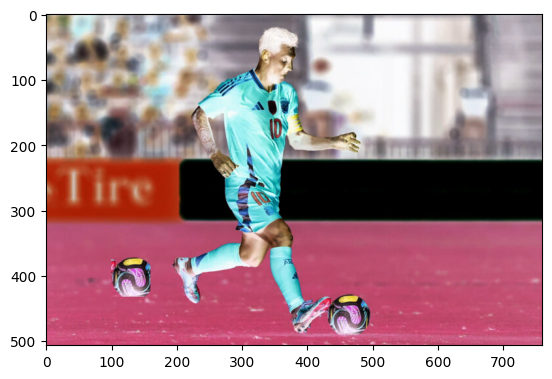

In [4]:
# Image ROI
from matplotlib import pyplot as plt
img = cv.imread('img.png')
img = cv.bitwise_not(img)
x = 150
y = 100
ball = img[280+x:340+x, 330+y:390+y]
img[373:433, 100:160] = ball


# рисуем
plt.imshow(img)
# выводим
plt.show()


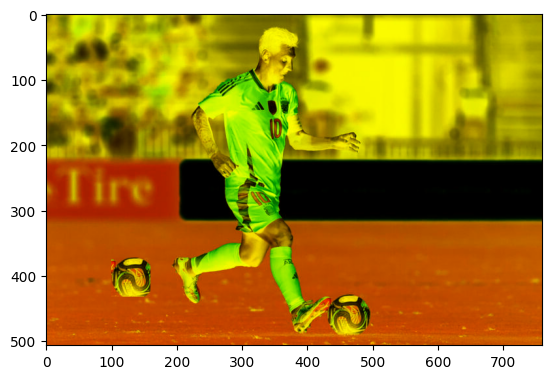

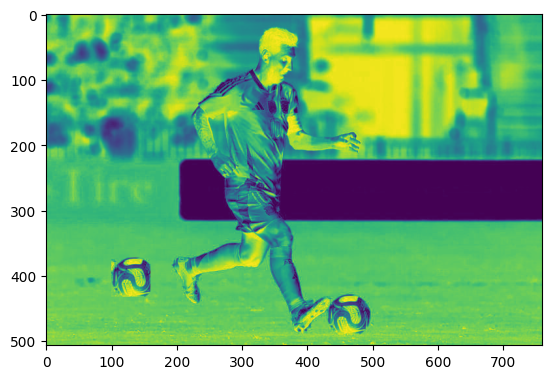

In [5]:
# Splitting and Merging Image Channels
b,g,r = cv.split(img)
img = cv.merge((b,g,r))
b = img[:,:,0]
img[:,:,2] = 0


plt.imshow(img)
# выводим
plt.show()

plt.imshow(b)
# выводим
plt.show()

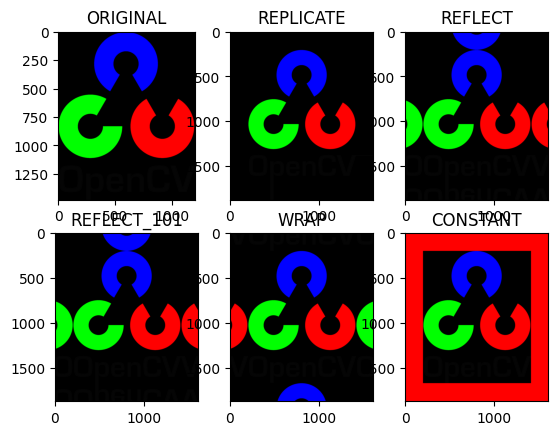

In [6]:
# Making Borders for Images (Padding)


import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]
border = 200

img1 = cv.imread('opencv-logo.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"

replicate = cv.copyMakeBorder(img1,border,border,border,border,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,border,border,border,border,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,border,border,border,border,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,border,border,border,border,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,border,border,border,border,cv.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()



### Arithmetic Operations on Images ###
Learn several arithmetic operations on images, like addition, subtraction, bitwise operations, and etc.

Learn these functions: cv.add(), cv.addWeighted(), etc.

In [7]:
# Adding Images
# There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

x = np.uint8([250])
y = np.uint8([10])

print( cv.add(x,y) ) # 250+10 = 260 => 255
# [[255]]

print( x+y )          # 250+10 = 260 % 256 = 4
# [4]

[[260.]
 [  0.]
 [  0.]
 [  0.]]
[4]


### Image Blending
This is also image addition, but different weights are given to images in order to give a feeling of blending or transparency.

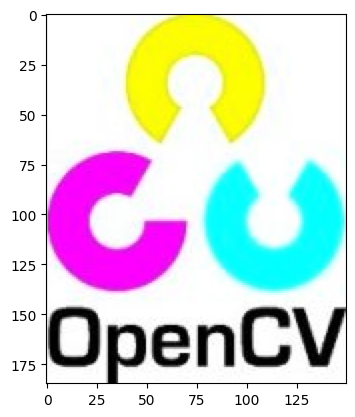

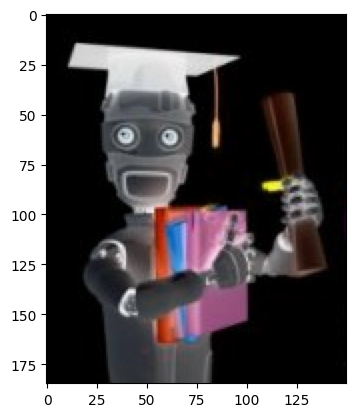

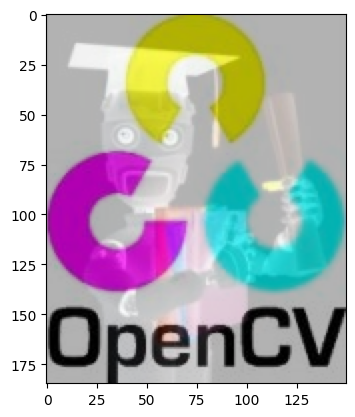

In [10]:
img1 = cv.imread('img_2_blend.png')
img1 = cv.bitwise_not(img1)
img2 = cv.imread('img_1_blend.png')
img2 = cv.bitwise_not(img2)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

dst1 = cv.addWeighted(img1, 0.7, img2, 0.3, 0)

plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(dst1)
plt.show()

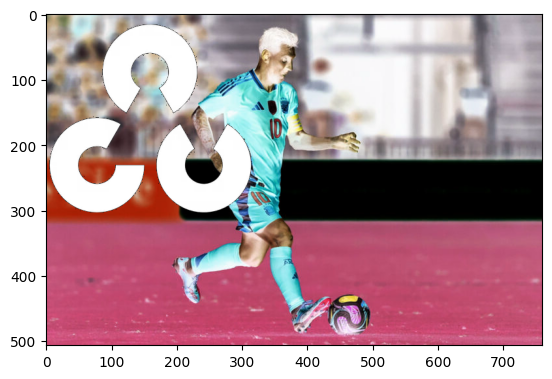

In [16]:
# Bitwise Operations

# Load two images
img1 = cv.imread('img.png')
img2 = cv.imread('open-cv-white.png')
img2 = cv.bitwise_not(img2)
img1 = cv.bitwise_not(img1)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

# cv.imshow('res',img1)
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.imshow(img1)
plt.show()



Geometric Transformations of Images

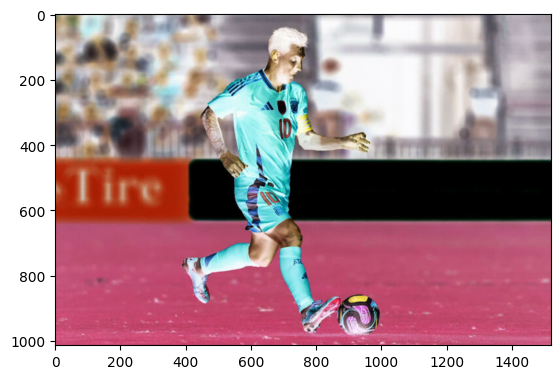

In [20]:
# Scaling

import numpy as np
import cv2 as cv

img = cv.imread('img.png')
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"

res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

plt.imshow(res)
plt.show()

In [ ]:
# Translation


